# Step 1: Data Collection

In [ ]:
import yfinance as yf

# data = yf.download("AAPL", start="2020-01-01", end="2023-01-01",auto_adjust=True)
# print(data.head())

In [ ]:
apple = yf.Ticker("AAPL")
print(apple.info)  # General information about Apple Inc.

for key, value in apple.info.items():
    print(key, ":", value)

print(apple.history(period="6mo"))

{'address1': 'One Apple Park Way', 'city': 'Cupertino', 'state': 'CA', 'zip': '95014', 'country': 'United States', 'phone': '(408) 996-1010', 'website': 'https://www.apple.com', 'industry': 'Consumer Electronics', 'industryKey': 'consumer-electronics', 'industryDisp': 'Consumer Electronics', 'sector': 'Technology', 'sectorKey': 'technology', 'sectorDisp': 'Technology', 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts, as w

## Working code to combine data from specified tickers into one dataframe with consistent column names:

In [ ]:
import yfinance as yf
import pandas as pd

# Define tickers and date range
tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN']
start_date = '2023-01-15'
end_date = '2024-01-15'

# Initialize list for all data
all_data_list = []

# Fetch and process data for each ticker
for ticker in tickers:
    print(f"Fetching data for {ticker}...")
    stock_data = yf.download(ticker, start=start_date, end=end_date)

    # Flatten the MultiIndex columns by taking only the first level
    stock_data.columns = [col[0] if isinstance(col, tuple) else col for col in stock_data.columns]

    # Add the 'Ticker' column to identify the stock
    stock_data['Ticker'] = ticker

    # Append to the list
    all_data_list.append(stock_data)

# Concatenate all ticker data into a single DataFrame
all_data = pd.concat(all_data_list)

# Ensure Date is the index
all_data.index.name = 'Date'

# Display the concatenated data
print("Combined data (first 5 rows):")
print(all_data.head())

#Print the first 5 rows that have 'MSFT' in the Ticker column
print("First 5 rows with 'MSFT' in the Ticker column:")
print(all_data[all_data['Ticker'] == 'MSFT'].head())

#Print all data with index 2023-01-17
print(all_data.loc['2023-01-17'])

# Check if there are any NaN values in the combined data
print("NaN values in combined data:")
print(all_data.isna().sum())


Fetching data for AAPL...


[*********************100%***********************]  1 of 1 completed


Fetching data for MSFT...


[*********************100%***********************]  1 of 1 completed


Fetching data for GOOG...


[*********************100%***********************]  1 of 1 completed


Fetching data for AMZN...


[*********************100%***********************]  1 of 1 completed

Combined data (first 5 rows):
                            Adj Close       Close        High         Low  \
Date                                                                        
2023-01-17 00:00:00+00:00  134.525330  135.940002  137.289993  134.130005   
2023-01-18 00:00:00+00:00  133.802917  135.210007  138.610001  135.029999   
2023-01-19 00:00:00+00:00  133.862305  135.270004  136.250000  133.770004   
2023-01-20 00:00:00+00:00  136.435242  137.869995  138.020004  134.220001   
2023-01-23 00:00:00+00:00  139.641525  141.110001  143.320007  137.899994   

                                 Open    Volume Ticker  
Date                                                    
2023-01-17 00:00:00+00:00  134.830002  63646600   AAPL  
2023-01-18 00:00:00+00:00  136.820007  69672800   AAPL  
2023-01-19 00:00:00+00:00  134.080002  58280400   AAPL  
2023-01-20 00:00:00+00:00  135.279999  80223600   AAPL  
2023-01-23 00:00:00+00:00  138.119995  81760300   AAPL  
First 5 rows with 'MSFT' in the

## Working code with imported S&P 500 ticker list

In [ ]:
import yfinance as yf
import pandas as pd
from pprint import pprint
import numpy as np

# Define tickers and date range
import pandas as pd

# Fetch S&P 500 tickers from Wikipedia
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
sp500_table = pd.read_html(url, header=0)[0]

# Extract the ticker symbols column
sp500_tickers = sp500_table["Symbol"].tolist()

tickers = sorted(sp500_tickers)

# Display the tickers
# pprint(np.array(tickers))

start_date = '2023-01-15'
end_date = '2024-01-15'

# Initialize list for all data
all_data_list = []

# Fetch and process data for each ticker
for ticker in tickers:
    try:
        # print(f"Fetching data for {ticker}...")
        stock_data = yf.download(ticker, start=start_date, end=end_date)

        # Check if the ticker data is returned
        if stock_data.empty:
            print(f"Warning: No data found for {ticker}. It may not exist or is unavailable.")
            continue  # Skip the ticker if no data is found

        # Flatten the MultiIndex columns by taking only the first level
        stock_data.columns = [col[0] if isinstance(col, tuple) else col for col in stock_data.columns]

        # Add the 'Ticker' column to identify the stock
        stock_data['Ticker'] = ticker

        # Append to the list
        all_data_list.append(stock_data)

    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        continue  # Skip this ticker on error

# Concatenate all ticker data into a single DataFrame
all_data = pd.concat(all_data_list)

# Ensure Date is the index
all_data.index.name = 'Date'

#Add a date column in for plotting later
all_data['Date'] = all_data.index

# Display the concatenated data
print("Combined data (first 5 rows):")
print(all_data.head())

# #Print the first 5 rows that have 'MSFT' in the Ticker column
# print("First 5 rows with 'MSFT' in the Ticker column:")
# print(all_data[all_data['Ticker'] == 'MSFT'].head())

# #Print all data with index 2023-01-17
# print(all_data.loc['2023-01-17'])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK.B']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SW']: possibly delisted; no price data found  (1d 2023-01-15 -> 2024-01-15) (Yahoo error = "Data doesn't exist for startDate = 1673758800, endDate = 1705294800")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Combined data (first 5 rows):
                            Adj Close       Close        High         Low  \
Date                                                                        
2023-01-17 00:00:00+00:00  153.499100  155.399994  158.110001  155.029999   
2023-01-18 00:00:00+00:00  152.185364  154.070007  158.160004  153.639999   
2023-01-19 00:00:00+00:00  151.000046  152.869995  154.919998  152.139999   
2023-01-20 00:00:00+00:00  154.012741  155.919998  156.009995  152.410004   
2023-01-23 00:00:00+00:00  157.114365  159.059998  159.589996  155.669998   

                                 Open   Volume Ticker  \
Date                                                    
2023-01-17 00:00:00+00:00  156.679993  1602200      A   
2023-01-18 00:00:00+00:00  156.259995  1150700      A   
2023-01-19 00:00:00+00:00  153.580002  1017400      A   
2023-01-20 00:00:00+00:00  153.500000  1343700      A   
2023-01-23 00:00:00+00:00  156.000000   974900      A   

                              

# Step 2: Exploratory Data Analysis

## Looking at data and check data types

In [ ]:
# Check the first and last few rows of the dataset
print("First 5 rows of the data:")
print(all_data.head())
print("Last 5 rows of the data:")
print(all_data.tail())

# Check data types of the columns
print("\n","Data types of the columns:")
print(all_data.dtypes)

First 5 rows of the data:
                            Adj Close       Close        High         Low  \
Date                                                                        
2023-01-17 00:00:00+00:00  153.499100  155.399994  158.110001  155.029999   
2023-01-18 00:00:00+00:00  152.185364  154.070007  158.160004  153.639999   
2023-01-19 00:00:00+00:00  151.000046  152.869995  154.919998  152.139999   
2023-01-20 00:00:00+00:00  154.012741  155.919998  156.009995  152.410004   
2023-01-23 00:00:00+00:00  157.114365  159.059998  159.589996  155.669998   

                                 Open   Volume Ticker  \
Date                                                    
2023-01-17 00:00:00+00:00  156.679993  1602200      A   
2023-01-18 00:00:00+00:00  156.259995  1150700      A   
2023-01-19 00:00:00+00:00  153.580002  1017400      A   
2023-01-20 00:00:00+00:00  153.500000  1343700      A   
2023-01-23 00:00:00+00:00  156.000000   974900      A   

                                  

## Checking for Missing Values

Missing values per column:
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
Ticker       0
Date         0
dtype: int64


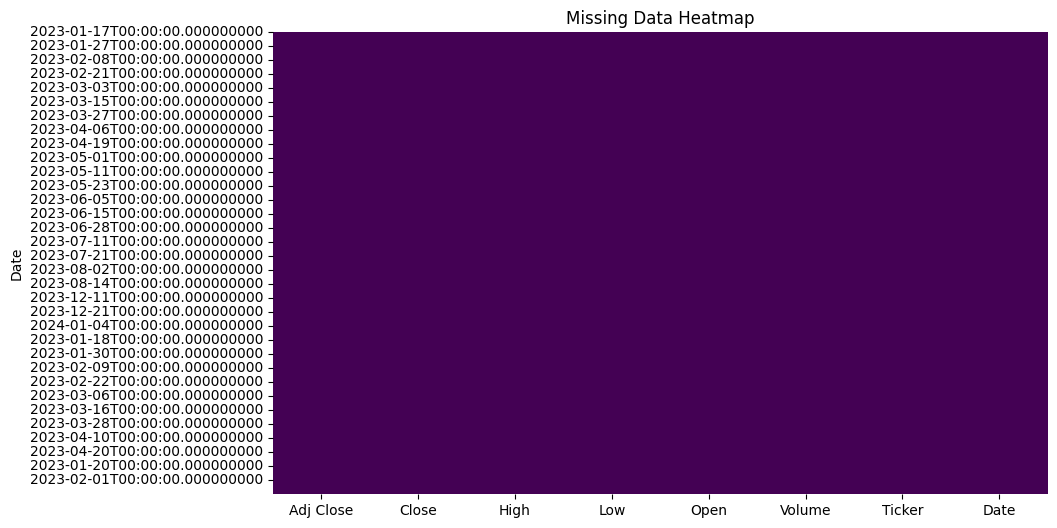

In [ ]:
# Check if there are any missing values
print("Missing values per column:")
print(all_data.isna().sum())

# Visualize missing data with a heatmap (optional, requires seaborn)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(all_data.isna(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


## Statistical Summary

In [ ]:
# Get basic statistics for numeric columns
print("Statistical summary of the data:")
print(all_data.describe())


Statistical summary of the data:
           Adj Close          Close           High            Low  \
count  123995.000000  123995.000000  123995.000000  123995.000000   
mean      169.849466     172.871641     174.633990     171.021531   
std       339.321806     340.156449     343.518071     336.656492   
min         6.730000       6.730000       6.895000       6.670000   
25%        56.259439      58.169998      58.750000      57.520000   
50%       102.018517     104.739998     105.879997     103.580002   
75%       194.118370     197.089996     199.309998     194.970001   
max      7242.240234    7242.240234    7267.020020    7189.160156   

                Open        Volume  
count  123995.000000  1.239950e+05  
mean      172.782957  5.928804e+06  
std       339.837443  2.494742e+07  
min         6.760000  0.000000e+00  
25%        58.139999  9.950000e+05  
50%       104.739998  2.013100e+06  
75%       197.199997  4.538800e+06  
max      7242.240234  1.543911e+09  


## Plots for selected or random tickers

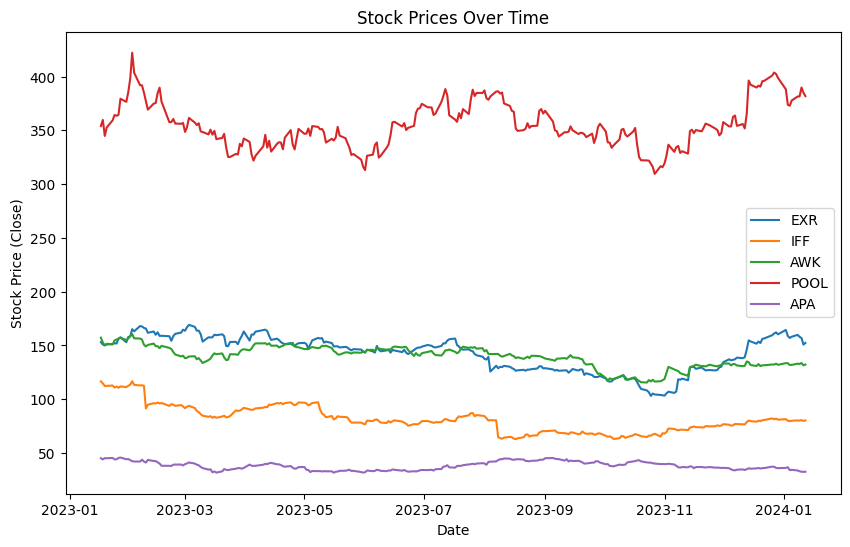

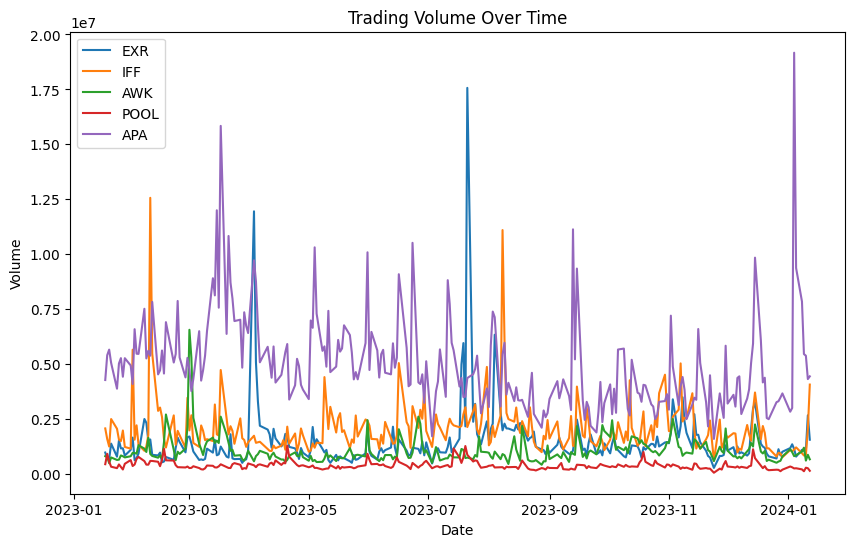

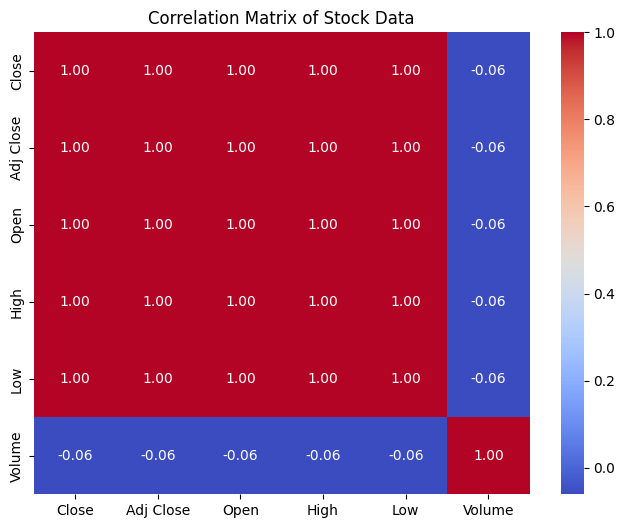

In [ ]:
# Plot stock price (Close) over time for a few tickers
#Select 5 random tickers to visualize
selected_tickers = np.random.choice(tickers, 5, replace=False)
# selected_tickers = ['AAPL', 'MSFT', 'GOOG']
plt.figure(figsize=(10,6))
for ticker in selected_tickers:
    ticker_data = all_data[all_data['Ticker'] == ticker]
    plt.plot(ticker_data['Date'], ticker_data['Close'], label=ticker)
plt.xlabel('Date')
plt.ylabel('Stock Price (Close)')
plt.title('Stock Prices Over Time')
plt.legend()
plt.show()

# Plot volume over time for the same tickers
plt.figure(figsize=(10,6))
for ticker in selected_tickers:
    ticker_data = all_data[all_data['Ticker'] == ticker]
    plt.plot(ticker_data['Date'], ticker_data['Volume'], label=ticker)
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Trading Volume Over Time')
plt.legend()
plt.show()

# Correlation matrix to inspect relationships between stock price columns
correlation_matrix = all_data[['Close', 'Adj Close', 'Open', 'High', 'Low', 'Volume']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Stock Data')
plt.show()


## Candlestick Chart for single Ticker

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Select a Ticker
chosen_ticker = 'GOOG'

# Filter the data for the selected ticker
ticker_data = all_data[all_data['Ticker'] == chosen_ticker]

# Prepare data for the candlestick chart
candlestick_data = ticker_data[['Open', 'High', 'Low', 'Close']].copy()

# Reset the index so that the Date is a column
candlestick_data.reset_index(inplace=True)

# Create the candlestick chart
fig = go.Figure(data=[go.Candlestick(x=candlestick_data['Date'],
                                     open=candlestick_data['Open'],
                                     high=candlestick_data['High'],
                                     low=candlestick_data['Low'],
                                     close=candlestick_data['Close'])])

# Customize the layout of the chart
fig.update_layout(
    title='%s Candlestick Chart' % chosen_ticker,
    xaxis_title='Date',
    yaxis_title='Price',
    template='plotly_dark'  # You can choose different templates such as 'plotly', 'ggplot2', etc.
)

# Show the chart
fig.show()


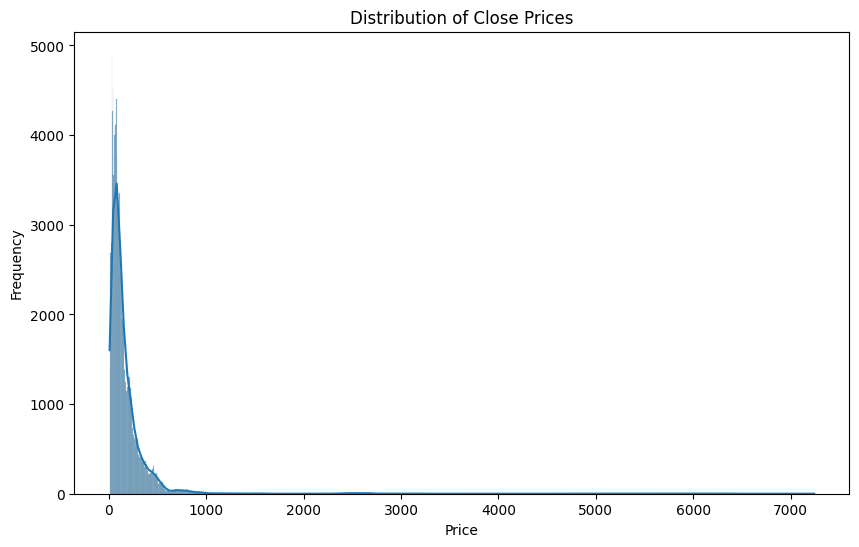

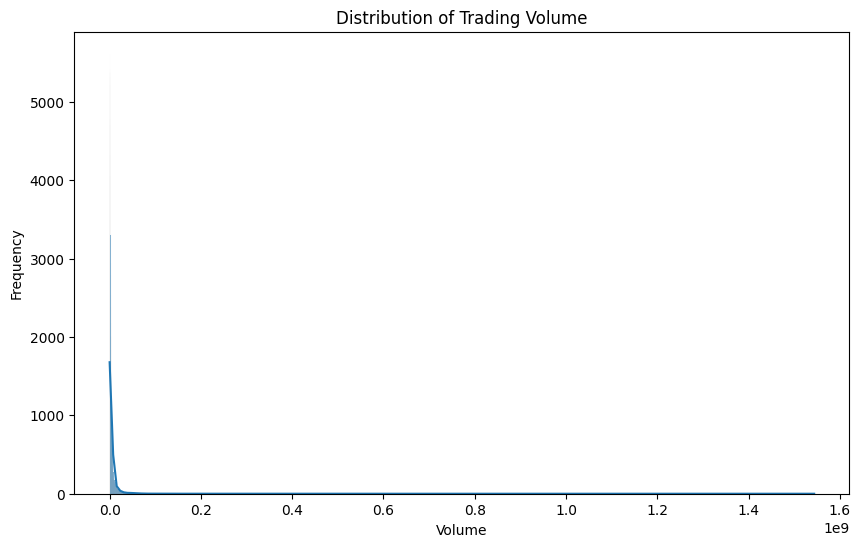

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of Close prices
plt.figure(figsize=(10, 6))
sns.histplot(all_data['Close'], kde=True)
plt.title("Distribution of Close Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Plot the distribution of Trading Volume
plt.figure(figsize=(10, 6))
sns.histplot(all_data['Volume'], kde=True)
plt.title("Distribution of Trading Volume")
plt.xlabel("Volume")
plt.ylabel("Frequency")
plt.show()


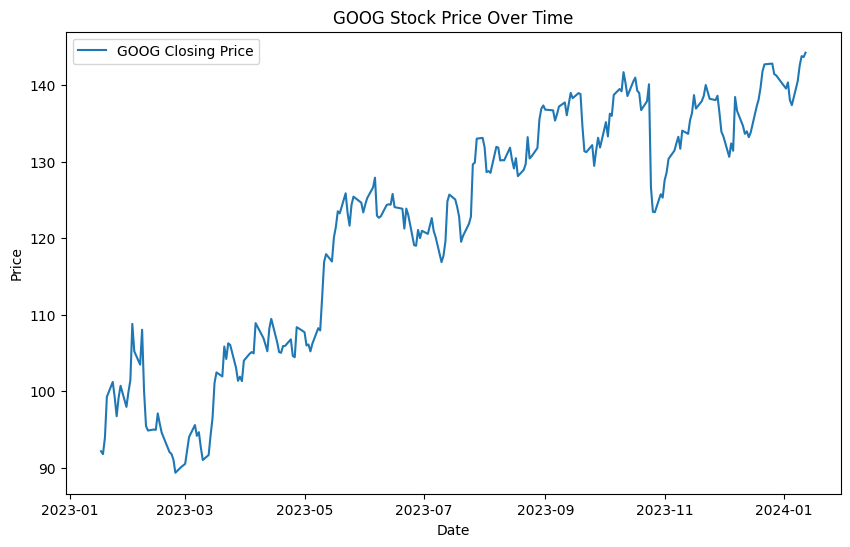

In [ ]:
# Visualize the closing prices for a specific ticker (e.g., 'AAPL')
plt.figure(figsize=(10, 6))
plt.plot(ticker_data.index, ticker_data['Close'], label='%s Closing Price' % chosen_ticker)
plt.title("%s Stock Price Over Time" % chosen_ticker)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


<ipython-input-12-68b6bf737d19>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-12-68b6bf737d19>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



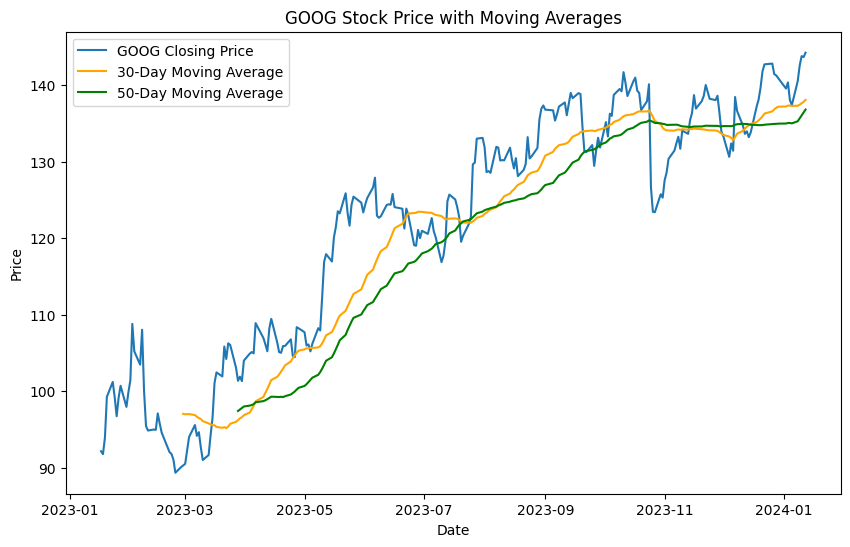

In [ ]:
# Calculate 30-day and 50-day moving averages for 'AAPL'
ticker_data['MA30'] = ticker_data['Close'].rolling(window=30).mean()
ticker_data['MA50'] = ticker_data['Close'].rolling(window=50).mean()

# Plot the closing prices and moving averages
plt.figure(figsize=(10, 6))
plt.plot(ticker_data.index, ticker_data['Close'], label='%s Closing Price' % chosen_ticker)
plt.plot(ticker_data.index, ticker_data['MA30'], label='30-Day Moving Average', color='orange')
plt.plot(ticker_data.index, ticker_data['MA50'], label='50-Day Moving Average', color='green')
plt.title("%s Stock Price with Moving Averages" % chosen_ticker)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


<ipython-input-13-f50508865562>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-13-f50508865562>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



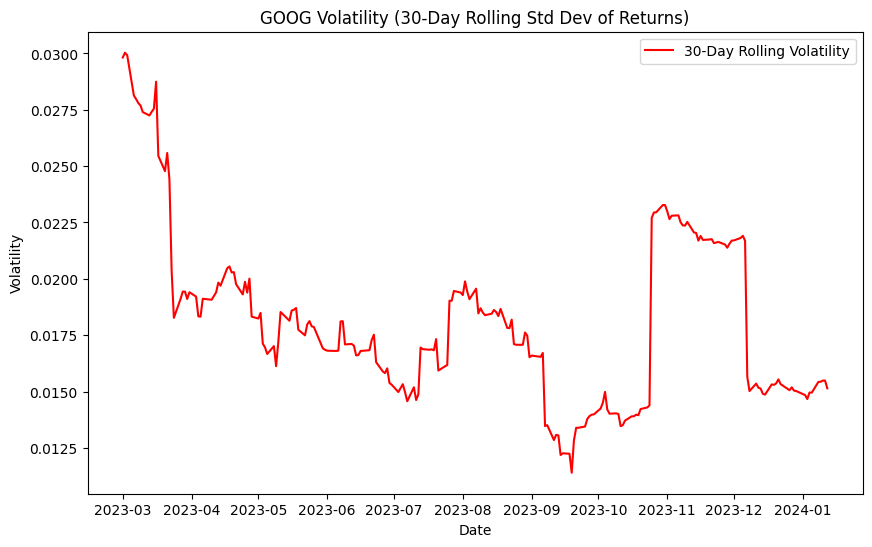

In [ ]:
# Calculate daily percentage change
ticker_data['Daily_Return'] = ticker_data['Close'].pct_change()

# Calculate volatility (rolling standard deviation of daily returns)
ticker_data['Volatility'] = ticker_data['Daily_Return'].rolling(window=30).std()

# Plot volatility
plt.figure(figsize=(10, 6))
plt.plot(ticker_data.index, ticker_data['Volatility'], label='30-Day Rolling Volatility', color='red')
plt.title("%s Volatility (30-Day Rolling Std Dev of Returns)" % chosen_ticker)
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()


<ipython-input-14-3256f2aaf87b>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



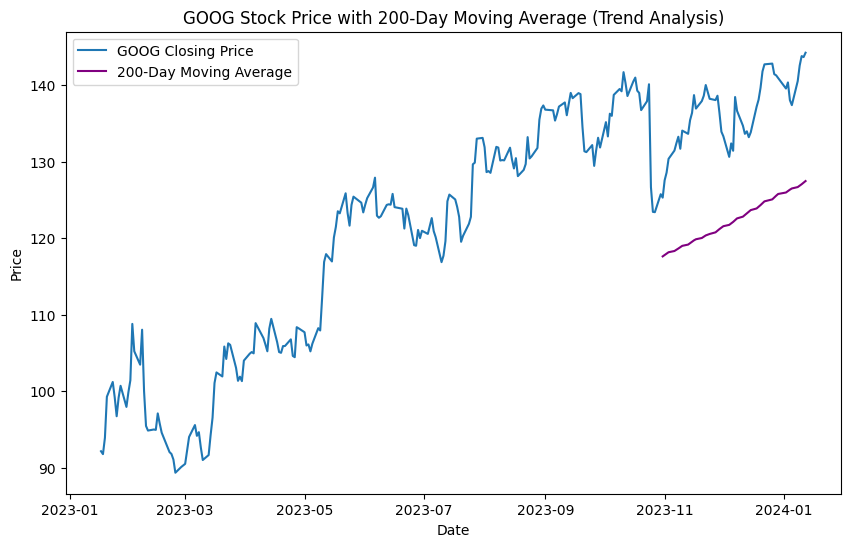

In [ ]:
# Identifying long-term trends using a longer moving average (e.g., 200-day moving average)
ticker_data['MA200'] = ticker_data['Close'].rolling(window=200).mean()

# Plot the closing price along with the 200-day moving average
plt.figure(figsize=(10, 6))
plt.plot(ticker_data.index, ticker_data['Close'], label='%s Closing Price' % chosen_ticker)
plt.plot(ticker_data.index, ticker_data['MA200'], label='200-Day Moving Average', color='purple')
plt.title("%s Stock Price with 200-Day Moving Average (Trend Analysis)" % chosen_ticker)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


# Step 3: Feature Engineering

The goal for this section is to identify goals and target variables. We will also create new input features and modify existing ones to fit models to later.

## 1) Define Prediction Problem

What do we want to predict?


*   Future closing price
*   Binary price movements
*   Percentage change





In [ ]:
# Define target variables
all_data['Future_Close'] = all_data['Close'].shift(-1)  # Predict next day's close
all_data['Price_Movement'] = (all_data['Future_Close'] > all_data['Close']).astype(int)  # Binary movement
all_data['Pct_Change'] = all_data['Close'].pct_change()  # Percentage change

# 2) Create lagged data

In [ ]:
# Lagged features for 'Close'
for lag in range(1, 6):  # Lag from 1 to 5 days
    all_data[f'Close_Lag{lag}'] = all_data['Close'].shift(lag)


# 3) Calculate rolling stats

In [ ]:
# Moving Averages
all_data['MA_10'] = all_data['Close'].rolling(window=10).mean()
all_data['MA_50'] = all_data['Close'].rolling(window=50).mean()

# Rolling Standard Deviation (Volatility)
all_data['Volatility_10'] = all_data['Close'].rolling(window=10).std()


# 4) Momentum and Technical Indicators

In [ ]:
# Rate of Change (ROC)
all_data['ROC_10'] = (all_data['Close'] - all_data['Close'].shift(10)) / all_data['Close'].shift(10)

# Relative Strength Index (RSI)
delta = all_data['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
all_data['RSI'] = 100 - (100 / (1 + rs))

# Bollinger Bands
all_data['BB_Middle'] = all_data['Close'].rolling(window=20).mean()
all_data['BB_Upper'] = all_data['BB_Middle'] + 2 * all_data['Close'].rolling(window=20).std()
all_data['BB_Lower'] = all_data['BB_Middle'] - 2 * all_data['Close'].rolling(window=20).std()


# 5) Volume based features

In [ ]:
# Moving Average of Volume
all_data['Volume_MA_10'] = all_data['Volume'].rolling(window=10).mean()

# Volume Change Rate
all_data['Volume_Change'] = all_data['Volume'].pct_change()


# 6) Datetime features

In [ ]:
# Add year, month, day, and day of the week
all_data['Year'] = all_data.index.year
all_data['Month'] = all_data.index.month
all_data['Day'] = all_data.index.day
all_data['DayOfWeek'] = all_data.index.dayofweek


7) Correlation for engineered features

In [ ]:
# Correlation with Future_Close and Pct_Change
correlations = all_data.corr(numeric_only=True) # Add numeric_only=True to only include numeric columns
print("Correlations with Future_Close:")
print(correlations['Future_Close'].sort_values(ascending=False)) # Set ascending=False to get decreasing order

print("Correlations with Pct_Change:")
print(correlations['Pct_Change'].sort_values(ascending=False)) # Set ascending=False to get decreasing order

Correlations with Future_Close:
Future_Close      1.000000
Close             0.995414
High              0.995369
Adj Close         0.995333
Low               0.995331
Open              0.995275
Close_Lag1        0.990811
Close_Lag2        0.986296
MA_10             0.982523
Close_Lag3        0.981815
Close_Lag4        0.977317
Close_Lag5        0.972891
BB_Middle         0.967086
MA_50             0.922830
BB_Lower          0.921579
BB_Upper          0.910503
Volatility_10     0.215884
ROC_10            0.150246
RSI               0.075447
Pct_Change        0.046312
Price_Movement    0.019244
Month             0.008789
Year              0.007753
DayOfWeek         0.000471
Day              -0.001355
Volume_Change    -0.003088
Volume_MA_10     -0.048945
Volume           -0.058797
Name: Future_Close, dtype: float64
Correlations with Pct_Change:
Pct_Change        1.000000
ROC_10            0.318635
Volatility_10     0.117047
RSI               0.057981
Low               0.046498
Close       

# 8) Handle missing values

In [ ]:
# Drop rows with missing values
all_data.dropna(inplace=True)


# 9) Feature scaling

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Select features to scale, excluding datetime columns
features_to_scale = [
    col for col in all_data.columns
    if col not in ['Ticker', 'Future_Close', 'Price_Movement', 'Pct_Change'] and
    pd.api.types.is_numeric_dtype(all_data[col])  # Explicitly check for numeric data type using pandas
]

# Replace infinite values with NaN
all_data[features_to_scale] = all_data[features_to_scale].replace([np.inf, -np.inf], np.nan)

# Impute or remove NaN values (choose one method)

# Method 1: Impute NaN with the mean of the column
# for col in features_to_scale:
#     all_data[col].fillna(all_data[col].mean(), inplace=True)

# Method 2: Remove rows with NaN values
all_data.dropna(subset=features_to_scale, inplace=True)

scaler = StandardScaler()

# Apply scaling only to selected features
scaled_features = scaler.fit_transform(all_data[features_to_scale])
scaled_data = pd.DataFrame(scaled_features, index=all_data.index, columns=features_to_scale)

# Add back target variables and any excluded columns
excluded_columns = [col for col in all_data.columns if col not in features_to_scale]
for col in excluded_columns:
    scaled_data[col] = all_data[col]

In [ ]:
scaled_data.head()

,Adj Close,Close,High,Low,Open,Volume,Close_Lag1,Close_Lag2,Close_Lag3,Close_Lag4,...,Volume_Change,Year,Month,Day,DayOfWeek,Ticker,Date,Future_Close,Price_Movement,Pct_Change
Date,,,,,,,,,,,,,,,,,,,,,
2023-03-28 00:00:00+00:00,-0.114472,-0.118307,-0.120300,-0.115884,-0.118422,-0.199904,-0.117012,-0.120273,-0.122712,-0.115068,...,-0.152282,-0.193472,-1.035244,1.391205,-0.752140,A,2023-03-28 00:00:00+00:00,133.850006,1,-0.003307
2023-03-29 00:00:00+00:00,-0.110921,-0.114721,-0.117593,-0.114042,-0.114273,-0.197491,-0.118306,-0.117011,-0.120272,-0.122710,...,-0.017501,-0.193472,-1.035244,1.505045,-0.034492,A,2023-03-29 00:00:00+00:00,134.490005,1,0.009199
2023-03-30 00:00:00+00:00,-0.109059,-0.112840,-0.113809,-0.111993,-0.110390,-0.178840,-0.114720,-0.118304,-0.117009,-0.120271,...,0.169226,-0.193472,-1.035244,1.618884,0.683157,A,2023-03-30 00:00:00+00:00,138.339996,1,0.004781
2023-03-31 00:00:00+00:00,-0.097854,-0.101524,-0.104525,-0.107420,-0.110008,-0.134291,-0.112839,-0.114718,-0.118303,-0.117008,...,0.305932,-0.193472,-1.035244,1.732723,1.400806,A,2023-03-31 00:00:00+00:00,137.860001,0,0.028627
2023-04-03 00:00:00+00:00,-0.098597,-0.102935,-0.106387,-0.104005,-0.104065,-0.175489,-0.101523,-0.112837,-0.114717,-0.118301,...,-0.233206,-0.193472,-0.742954,-1.454777,-1.469789,A,2023-04-03 00:00:00+00:00,138.210007,1,-0.003470


# Step 4: Modeling and Prediction

## Split Data into Test and Train

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Define features and targets
X = scaled_data.drop(columns=['Future_Close', 'Price_Movement', 'Pct_Change','Date'])
y_close = scaled_data['Future_Close']  # Target for regression
y_movement = scaled_data['Price_Movement']  # Target for classification
y_pct_change = scaled_data['Pct_Change']  # Target for regression

# Before splitting, store original string values and LabelEncoders
original_string_values = {}
label_encoders = {}

for column in X.select_dtypes(include=['object']).columns:
    original_string_values[column] = X[column].copy()  # Store original values
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le  # Store the encoder for later reversal


# Before splitting, convert any datetime columns to numeric using to_numeric
for column in X.select_dtypes(include=['datetime']).columns:
    # Convert datetime to Unix timestamp (seconds since epoch)
    X[column] = X[column].apply(lambda x: pd.Timestamp(x).timestamp())
    #Now, the 'Date' column should contain numerical values that the RandomForestRegressor can handle.



# Split into training and testing sets
X_train, X_test, y_close_train, y_close_test = train_test_split(X, y_close, test_size=0.2, random_state=42)
_, _, y_movement_train, y_movement_test = train_test_split(X, y_movement, test_size=0.2, random_state=42)
_, _, y_pct_train, y_pct_test = train_test_split(X, y_pct_change, test_size=0.2, random_state=42)


## Training Models

A). Regression model for Future Closing Price

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Train the model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_close_train)

# Make predictions
y_close_pred = rf_regressor.predict(X_test)

# Evaluate
print("Regression (Future Close):")
print(f"Mean Squared Error: {mean_squared_error(y_close_test, y_close_pred):.4f}")
print(f"R^2 Score: {r2_score(y_close_test, y_close_pred):.4f}")


Regression (Future Close):
Mean Squared Error: 879.7086
R^2 Score: 0.9917


## B). Classification for Price Movement

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train the model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_movement_train)

# Make predictions
y_movement_pred = log_reg.predict(X_test)

# Evaluate
print("\nClassification (Price Movement):")
print(f"Accuracy: {accuracy_score(y_movement_test, y_movement_pred):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_movement_test, y_movement_pred))
print("Classification Report:")
print(classification_report(y_movement_test, y_movement_pred))



Classification (Price Movement):
Accuracy: 0.5339
Confusion Matrix:
[[4735 7264]
 [4289 8501]]
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.39      0.45     11999
           1       0.54      0.66      0.60     12790

    accuracy                           0.53     24789
   macro avg       0.53      0.53      0.52     24789
weighted avg       0.53      0.53      0.53     24789



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



## C). Regression for Percent Change

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Train the model
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train, y_pct_train)

# Make predictions
y_pct_pred = gbr.predict(X_test)

# Evaluate
print("\nRegression (Percentage Change):")
print(f"Mean Squared Error: {mean_squared_error(y_pct_test, y_pct_pred):.4f}")
print(f"R^2 Score: {r2_score(y_pct_test, y_pct_pred):.4f}")



Regression (Percentage Change):
Mean Squared Error: 0.0214
R^2 Score: 0.7603


In [ ]:
# After prediction, convert encoded values back to original strings
def decode_labels(df):
    for column, encoder in label_encoders.items():
        if column in df.columns:
            df[column] = encoder.inverse_transform(df[column].astype(int))  # Revert encoding
    return df

# Example usage: Decoding labels in X_test after prediction
X_test_decoded = decode_labels(X_test.copy())  # Create a copy to avoid modifying the original

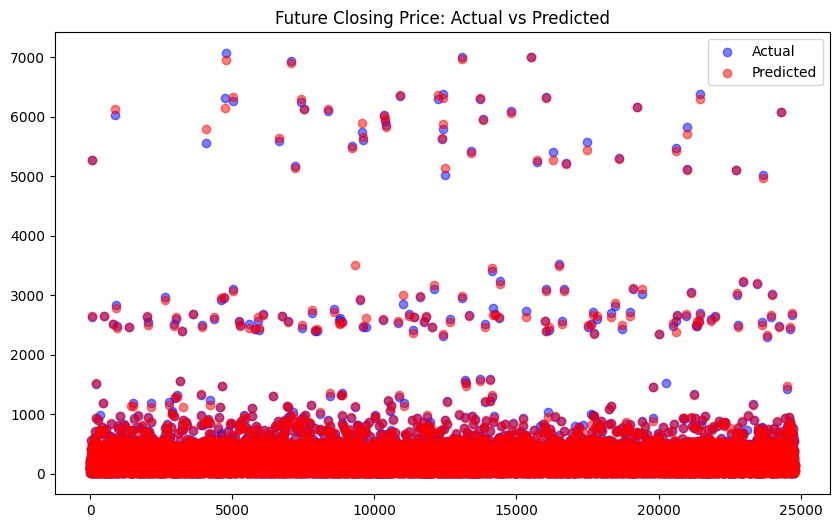

In [ ]:
import matplotlib.pyplot as plt

# Visualize predictions for Future Closing Price
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_close_test)), y_close_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(range(len(y_close_test)), y_close_pred, color='red', label='Predicted', alpha=0.5)
plt.title("Future Closing Price: Actual vs Predicted")
plt.legend()
plt.show()


In [ ]:
import plotly.express as px
import pandas as pd

def plot_future_closing_price_plotly(ticker, y_actual, y_pred):
    """
    Creates a Plotly scatter plot to visualize actual vs predicted future closing prices for a specific ticker.

    Args:
        ticker (str): The stock ticker symbol.
        y_actual (array-like): Array of actual future closing prices.
        y_pred (array-like): Array of predicted future closing prices.
    """
    df = pd.DataFrame({
        "Actual": y_actual,
        "Predicted": y_pred,
        "Day": range(len(y_actual))  # Create an index for x-axis
    })
    fig = px.scatter(
        df,
        x="Day",
        y=["Actual", "Predicted"],
        title=f"{ticker}: Actual vs Predicted Future Closing Price",
        labels={"value": "Closing Price", "Day": "Day"},
    )
    fig.update_traces(marker=dict(size=8, opacity=0.6))
    fig.show()

In [ ]:
X_test_decoded.head()

,Adj Close,Close,High,Low,Open,Volume,Close_Lag1,Close_Lag2,Close_Lag3,Close_Lag4,...,BB_Middle,BB_Upper,BB_Lower,Volume_MA_10,Volume_Change,Year,Month,Day,DayOfWeek,Ticker
Date,,,,,,,,,,,,,,,,,,,,,
2023-09-26 00:00:00+00:00,-0.122590,-0.130240,-0.128885,-0.130109,-0.126571,0.793035,-0.122773,-0.125300,-0.124740,-0.115039,...,-0.113196,-0.135836,-0.072108,0.847022,0.083280,-0.193472,0.718495,1.163527,-0.752140,GOOGL
2023-06-15 00:00:00+00:00,0.068930,0.077975,0.075430,0.064086,0.058951,-0.102582,0.056667,0.034654,0.019841,0.010731,...,0.046929,0.025159,0.067970,-0.136099,-0.096630,-0.193472,-0.158375,-0.088705,0.683157,EL
2023-10-09 00:00:00+00:00,-0.282414,-0.290605,-0.292134,-0.289141,-0.290352,-0.219902,-0.289575,-0.291631,-0.290160,-0.293480,...,-0.295305,-0.304194,-0.249432,-0.214333,-0.190063,-0.193472,1.010784,-0.771741,-1.469789,HSIC
2023-01-17 00:00:00+00:00,0.239258,0.229787,0.251281,0.220178,0.224439,-0.060221,-0.229291,-0.229495,-0.229582,-0.230022,...,-0.206936,-0.052432,-0.371211,-0.155677,0.800235,-0.193472,-1.619824,0.138973,-0.752140,ENPH
2023-03-24 00:00:00+00:00,-0.225447,-0.231615,-0.231800,-0.231676,-0.229423,0.144433,-0.226470,-0.229202,-0.224380,-0.231197,...,-0.228022,-0.233950,-0.193743,0.156665,-0.046925,-0.193472,-1.035244,0.935848,1.400806,DIS


In [ ]:
import plotly.express as px
import pandas as pd

# Enhanced Scatterplot with Hover Data
def plot_percentage_change_predictions_plotly(y_test, y_pred, tickers, title="Percentage Change Predictions"):
    df = pd.DataFrame({
        "Actual": y_test,
        "Predicted": y_pred,
        "Ticker": tickers  # Add Ticker data
    })
    fig = px.scatter(
        df,
        x="Actual",
        y="Predicted",
        trendline="ols",
        title=title,
        labels={"Actual": "Actual Percentage Change", "Predicted": "Predicted Percentage Change"},
        hover_data=["Ticker"]  # Include Ticker in hover
    )
    fig.update_traces(marker=dict(size=8, opacity=0.6))
    fig.show()

# Example usage
plot_percentage_change_predictions_plotly(
    y_pct_test,
    y_pct_pred,
    X_test_decoded["Ticker"].values  # Pass the Ticker data
)


In [ ]:
def visualize_ticker_model_accuracy_plotly(ticker, X, y_true_close, y_true_move, y_true_pct, label_encoders):
    # Get the numeric label for the given ticker
    try:
        numeric_ticker = label_encoders['Ticker'].transform([ticker])[0]
    except KeyError:
        print(f"Ticker '{ticker}' not found in label encoder.")
        return

    # Filter data using the numeric label
    ticker_data = X[X['Ticker'] == numeric_ticker]

    # Check if ticker_data is empty
    if ticker_data.empty:
        print(f"No data found for ticker: {ticker}")
        return  # Exit the function if no data is found

    y_close_actual = y_true_close.loc[ticker_data.index]
    y_move_actual = y_movement_test.loc[ticker_data.index]
    y_pct_actual = y_true_pct.loc[ticker_data.index]

    # Predict for the selected ticker
    y_close_pred_ticker = rf_regressor.predict(ticker_data)
    y_pct_pred_ticker = gbr.predict(ticker_data)

    # Ensure lengths of y_close_actual and y_close_pred_ticker are equal
    min_len = min(len(y_close_actual), len(y_close_pred_ticker))
    y_close_actual = y_close_actual[:min_len]
    y_close_pred_ticker = y_close_pred_ticker[:min_len]

    # Plot closing price predictions
    plot_future_closing_price_plotly(ticker, y_close_actual.values, y_close_pred_ticker)

    # Plot percentage change predictions
        # Predict for the selected ticker
    y_close_pred_ticker = rf_regressor.predict(ticker_data)
    y_pct_pred_ticker = gbr.predict(ticker_data)

    # Ensure lengths of y_pct_actual and y_pct_pred_ticker are equal
    min_len = min(len(y_pct_actual), len(y_pct_pred_ticker))
    y_pct_actual = y_pct_actual[:min_len]  # Truncate y_pct_actual
    y_pct_pred_ticker = y_pct_pred_ticker[:min_len]  # Truncate y_pct_pred_ticker

    # Plot percentage change predictions
    plot_percentage_change_predictions_plotly(y_pct_actual, y_pct_pred_ticker, [ticker] * min_len, title=f"{ticker}: Percentage Change Predictions")  # Use min_len for ticker list


## Use this to look at data for specific Ticker

In [ ]:
# Example usage:
chosen_ticker = chosen_ticker
visualize_ticker_model_accuracy_plotly(chosen_ticker, X_test, y_close_test, y_movement_test, y_pct_test, label_encoders)

In [ ]:
import joblib

# Save models
joblib.dump(rf_regressor, "rf_regressor_future_close.pkl")
joblib.dump(log_reg, "logistic_reg_price_movement.pkl")
joblib.dump(gbr, "gradient_boosting_pct_change.pkl")


['gradient_boosting_pct_change.pkl']